# Classification and discriminant analysis


### Linear Disciminant Analysis

### Data Preparation

Linear Discriminant Analysis (LDA) as a supervised classification model relies on a few key assumptions. It assumes the data for each class follows a **multivariate normal distribution**, the **covariance matrices** are the same across classes, and features are **independent** (i.e., not highly correlated). LDA also assumes **class balance** and can be sensitive to **outliers**. To ensure LDA is appropriate, check for normality, similar covariance matrices across classes, multicollinearity between features, and class balance without significant outliers. 

#### Distributions

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from scipy.stats import anderson

# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the species column to the DataFrame
df['species'] = iris.target_names[iris.target]

# Filter for two species: Versicolor and Virginica
df = df[df['species'].isin(['versicolor', 'virginica'])]

# Function to run Anderson-Darling test for normality
def run_anderson_darling_test(data, feature_name):
    result = anderson(data, dist='norm')
    print(f"Anderson-Darling test for normality on {feature_name}:")
    print(f"Statistic: {result.statistic}")
    print(f"Critical value for {result.significance_level[2]}% significance level: {result.critical_values[2]}")
    print(f"Result: {'Normal' if result.statistic < result.critical_values[2] else 'Not normal'}\n")

# Iterate over all features and run the Anderson-Darling test
for feature in iris.feature_names:
    # Select data for the current feature for both species
    versicolor_data = df[df['species'] == 'versicolor'][feature]
    virginica_data = df[df['species'] == 'virginica'][feature]
    
    # Run the Anderson-Darling test for Versicolor and Virginica for the current feature
    print(f"\n--- {feature} ---\n")
    print("Anderson-Darling test for Versicolor:")
    run_anderson_darling_test(versicolor_data, f"Versicolor {feature}")
    
    print("Anderson-Darling test for Virginica:")
    run_anderson_darling_test(virginica_data, f"Virginica {feature}")



--- sepal length (cm) ---

Anderson-Darling test for Versicolor:
Anderson-Darling test for normality on Versicolor sepal length (cm):
Statistic: 0.360841172628966
Critical value for 5.0% significance level: 0.736
Result: Normal

Anderson-Darling test for Virginica:
Anderson-Darling test for normality on Virginica sepal length (cm):
Statistic: 0.5516407106574803
Critical value for 5.0% significance level: 0.736
Result: Normal


--- sepal width (cm) ---

Anderson-Darling test for Versicolor:
Anderson-Darling test for normality on Versicolor sepal width (cm):
Statistic: 0.5597551894792261
Critical value for 5.0% significance level: 0.736
Result: Normal

Anderson-Darling test for Virginica:
Anderson-Darling test for normality on Virginica sepal width (cm):
Statistic: 0.6182051146414693
Critical value for 5.0% significance level: 0.736
Result: Normal


--- petal length (cm) ---

Anderson-Darling test for Versicolor:
Anderson-Darling test for normality on Versicolor petal length (cm):
Stati

The non-normality of the petal width feature may slightly affect the performance of Linear Discriminant Analysis (LDA), as LDA assumes that features are normally distributed within each class. However, since LDA is relatively robust to violations of this assumption, especially when the sample size is large, the impact of non-normality in just one feature may be minimal. If necessary, transformations like log or square root could be applied to petal width to improve its normality, but in many cases, LDA can still perform effectively even with some non-normality present in the data.

#### Covariance matricies

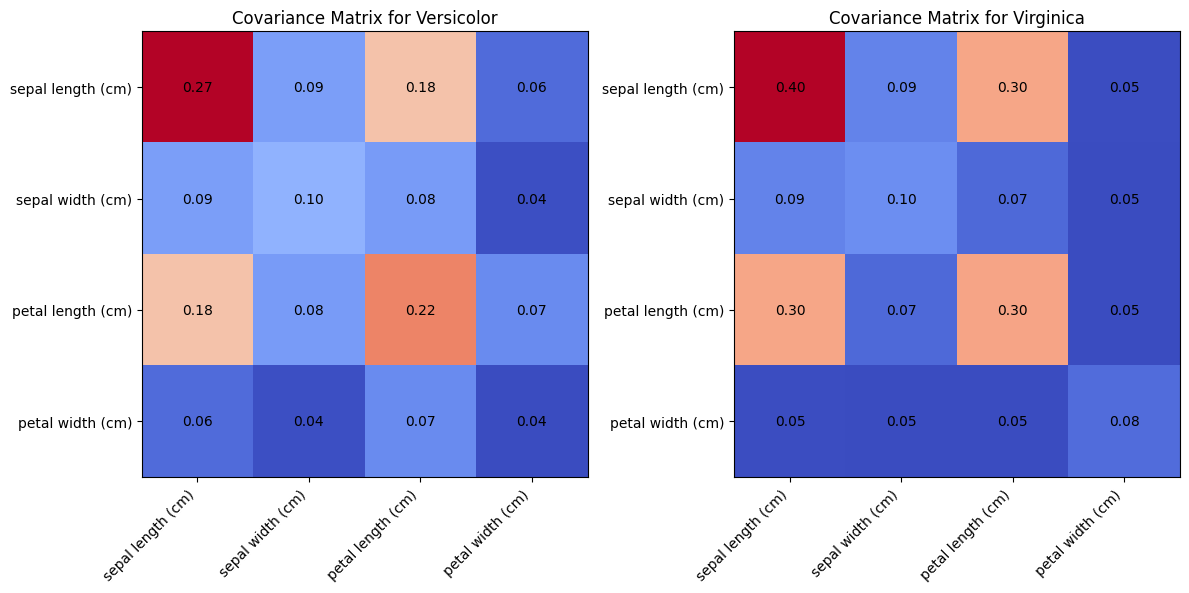

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Load the iris dataset
iris = load_iris()

# Create a DataFrame with the features
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the species column to the DataFrame
df['species'] = iris.target_names[iris.target]

# Filter for only Virginica and Versicolor species
df = df[df['species'].isin(['virginica', 'versicolor'])]

# Separate the data by species
versicolor_data = df[df['species'] == 'versicolor'].iloc[:, :-1]  # Exclude 'species' column
virginica_data = df[df['species'] == 'virginica'].iloc[:, :-1]

# Compute covariance matrices
cov_versicolor = versicolor_data.cov()
cov_virginica = virginica_data.cov()

# Plotting the covariance matrices using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Versicolor covariance matrix
axes[0].imshow(cov_versicolor, cmap="coolwarm", interpolation='none')
axes[0].set_title("Covariance Matrix for Versicolor")
axes[0].set_xticks(np.arange(cov_versicolor.shape[0]))
axes[0].set_yticks(np.arange(cov_versicolor.shape[1]))
axes[0].set_xticklabels(cov_versicolor.columns)
axes[0].set_yticklabels(cov_versicolor.columns)
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha="right")
for i in range(cov_versicolor.shape[0]):
    for j in range(cov_versicolor.shape[1]):
        axes[0].text(j, i, f"{cov_versicolor.iloc[i, j]:.2f}",
                     ha="center", va="center", color="black")

# Virginica covariance matrix
axes[1].imshow(cov_virginica, cmap="coolwarm", interpolation='none')
axes[1].set_title("Covariance Matrix for Virginica")
axes[1].set_xticks(np.arange(cov_virginica.shape[0]))
axes[1].set_yticks(np.arange(cov_virginica.shape[1]))
axes[1].set_xticklabels(cov_virginica.columns)
axes[1].set_yticklabels(cov_virginica.columns)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha="right")
for i in range(cov_virginica.shape[0]):
    for j in range(cov_virginica.shape[1]):
        axes[1].text(j, i, f"{cov_virginica.iloc[i, j]:.2f}",
                     ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

The dissimilarity in covariance matrices, particularly on the sepal length and petal length diagonals, as well as the off-diagonal between petal length and sepal length, suggests that the variances and relationships between these features differ across the two species. Since LDA assumes identical covariance matrices across classes, this violation could lead to inaccurate decision boundaries and poorer model performance. In this case, Quadratic Discriminant Analysis (QDA) might be a better alternative, as it allows different covariance matrices for each class.

#### Correlations

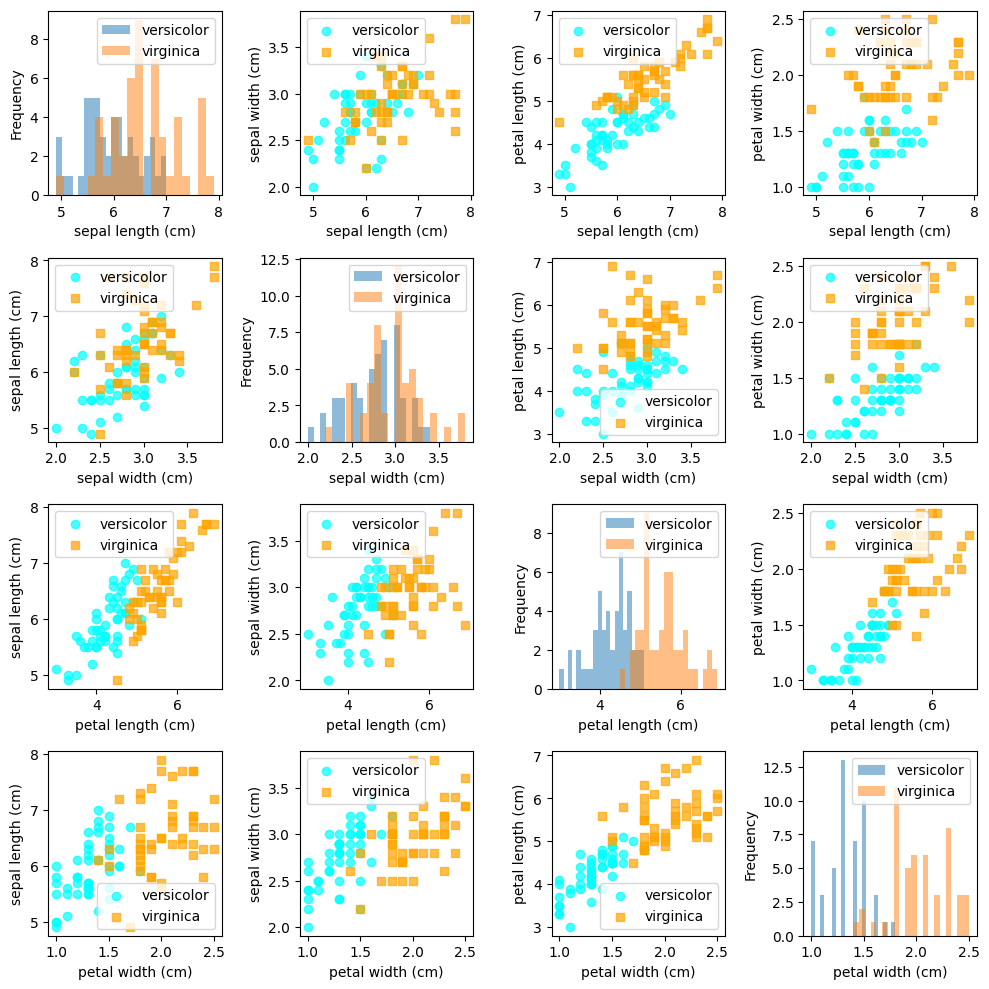

In [3]:
import itertools

# Set colors and markers based on species
colors = ['cyan', 'orange']
markers = ['o', 's']

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

# List of feature names (first 4 columns)
features = iris.feature_names[:4]

# Iterate through each subplot
for i, j in itertools.product(range(4), repeat=2):
    ax = axes[i, j]
    if i == j:  # Diagonal plots (histograms)
        for species in np.unique(df['species']):
            species_data = df[df['species'] == species]
            ax.hist(species_data[features[i]], bins=20, alpha=0.5, label=species)
        ax.set_xlabel(features[i])
        ax.set_ylabel('Frequency')
    else:  # Off-diagonal plots (scatterplots)
        for species, color, marker in zip(np.unique(df['species']), colors, markers):
            species_data = df[df['species'] == species]
            ax.scatter(species_data[features[i]], species_data[features[j]],
                       color=color, marker=marker, label=species, alpha=0.7)
        ax.set_xlabel(features[i])
        ax.set_ylabel(features[j])
    
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

LDA assumes that the features are independent of each other. Highly correlated features violate this assumption, as they carry similar information. This could reduce the model's effectiveness, especially when there is a lot of redundancy in the data. From the above plot we can see sepal length and petal length are highly correlated. PCA can help reduce the dimensionality of the dataset by creating uncorrelated components that capture most of the variance in the data, and should be investigated.


#### Class Balance

In [4]:
# Count the number of samples per species
class_counts = df['species'].value_counts()

# Print the class counts 
print("Class Balance (Number of samples per class):")
for species, count in class_counts.items():
    print(f"{species}: {count}")

Class Balance (Number of samples per class):
versicolor: 50
virginica: 50


A 50-50 class balance is ideal for LDA, as it ensures neither class dominates the model, allowing for a more accurate decision boundary. However, adding more samples could improve model robustness and generalizability, particularly in real-world scenarios where class imbalances are common. More samples would help LDA better capture the nuances between the classes

### Preprocessing
We want to make sure there are no gaps in the data before we proceed.

In [5]:
# Check for missing values (gaps) in the filtered dataset
missing_values = df.isnull().sum()

# Print the missing values count per column
print("Missing values in each column for the last two species (Virginica and Versicolor):")
print(missing_values)

# Check if there are any missing values in the entire filtered dataset
if missing_values.sum() == 0:
    print("\nThere are no missing values in the dataset for the last two species.")
else:
    print("\nThere are missing values in the dataset for the last two species.")


Missing values in each column for the last two species (Virginica and Versicolor):
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

There are no missing values in the dataset for the last two species.


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define feature matrix (X) and target variable (y)
X = df[iris.feature_names]  # Features
y = df['species']  # Target (still categorical)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

# Evaluate model
accuracy = lda.score(X_test_scaled, y_test)
print(f"Accuracy of LDA on normalized features: {accuracy:.2f}")

Accuracy of LDA on normalized features: 0.90


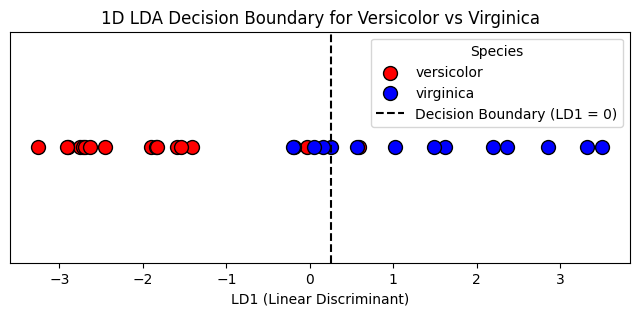

Calculated Decision Boundary: [0.25405283]


In [7]:
# Apply LDA (reduce to 1 component for binary classification)
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train_scaled, y_train)

# Calculate the decision boundary based on the formula
# Get the means and covariance matrix for each class
means = lda.means_  # Mean of each class in the LDA space
priors = np.array([np.mean(y_train == i) for i in lda.classes_])  # Class priors

# Compute the decision boundary using LDA's class means and priors
w = lda.coef_.flatten()  # LDA weights (projection coefficients)
b = lda.intercept_  # LDA intercept
decision_boundary = -(b / w[0])  # Calculate decision boundary for 1D LDA

# Visualize the decision boundary
X_test_lda = lda.transform(X_test_scaled)

plt.figure(figsize=(8, 3))

# Plot the test data points along the LD1 axis, color them based on actual class
colors = ['red', 'blue']
for i, target_name in enumerate(iris.target_names[1:3]):  # Only for versicolor and virginica
    plt.scatter(X_test_lda[y_test == target_name], np.zeros_like(X_test_lda[y_test == target_name]),
                label=target_name, color=colors[i], edgecolors='k', s=100)

# Plot the decision boundary
plt.axvline(x=decision_boundary, color='black', linestyle='--', label='Decision Boundary (LD1 = 0)')

# Add labels and legend
plt.title("1D LDA Decision Boundary for Versicolor vs Virginica")
plt.xlabel("LD1 (Linear Discriminant)")
plt.yticks([])  # No need for Y-axis, as it's 1D
plt.legend(title="Species")
plt.show()

print(f"Calculated Decision Boundary: {decision_boundary}")


### Prediction Model

In [8]:
import ipywidgets as widgets
from IPython.display import display

# Create interactive sliders for user input with adjusted descriptions
slider_labels = {
    'sepal length (cm)': 'Sepal Length',
    'sepal width (cm)': 'Sepal Width',
    'petal length (cm)': 'Petal Length',
    'petal width (cm)': 'Petal Width'
}

sliders = {
    name: widgets.FloatSlider(
        value=np.mean(df[name]), 
        min=np.min(df[name]), 
        max=np.max(df[name]), 
        step=0.1, 
        description=slider_labels.get(name, name),  # Use shortened label
        continuous_update=False  # Set this to False to only update on button press
    ) 
    for name in iris.feature_names
}

# Output widget for prediction
output = widgets.Output()

# Function to make predictions based on slider values
def predict_species(b):
    with output:
        output.clear_output(wait=True)
        # Get input values
        user_input = pd.DataFrame([[s.value for s in sliders.values()]], columns=iris.feature_names)
        # Standardize input
        user_input_scaled = scaler.transform(user_input)
        # Predict species
        predicted_species = lda.predict(user_input_scaled)[0]
        # Display result
        print(f"The predicted species is: {predicted_species.upper()}")

# Create a button to trigger the prediction
predict_button = widgets.Button(description="Predict Species")
predict_button.on_click(predict_species)

# Display sliders and button
display(*sliders.values(), predict_button, output)


FloatSlider(value=6.2620000000000005, continuous_update=False, description='Sepal Length', max=7.9, min=4.9)

FloatSlider(value=2.8719999999999994, continuous_update=False, description='Sepal Width', max=3.8, min=2.0)

FloatSlider(value=4.906, continuous_update=False, description='Petal Length', max=6.9, min=3.0)

FloatSlider(value=1.6760000000000006, continuous_update=False, description='Petal Width', max=2.5, min=1.0)

Button(description='Predict Species', style=ButtonStyle())

Output()